In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [32]:
df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [33]:
df1.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [34]:
print(df.columns)
print(" ")
print(df1.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
 
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [35]:
df1.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [36]:
df1.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [37]:
df1['team1'] = df1['team1'].replace('Delhi Daredevils', 'Delhi Capitals')

In [39]:
df1['team2'] = df1['team2'].replace('Delhi Daredevils', 'Delhi Capitals')

In [40]:
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [53]:
## Extract RR and DC

# Ques -1 : who will win ?

In [42]:
main_df = df1[((df1['team1'] == 'Rajasthan Royals') & (df1['team2'] == 'Delhi Capitals')) | ((df1['team1'] == 'Delhi Capitals') & (df1['team2'] == 'Rajasthan Royals'))]

In [47]:
print(main_df.shape)
(main_df.head())


(20, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
92,93,2008,Jaipur,2008-05-11,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Capitals,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN
132,133,2009,Centurion,2009-04-28,Delhi Capitals,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Rajasthan Royals,0,5,YK Pathan,SuperSport Park,GAV Baxter,RE Koertzen,NaN
164,165,2009,Bloemfontein,2009-05-17,Delhi Capitals,Rajasthan Royals,Delhi Daredevils,bat,normal,0,Delhi Daredevils,14,0,AB de Villiers,OUTsurance Oval,SS Hazare,IL Howell,NaN


In [48]:
main_df['winner'] = main_df['winner'].replace('Delhi Daredevils', 'Delhi Capitals')

In [49]:
main_df['winner'].value_counts()

Rajasthan Royals    11
Delhi Capitals       9
Name: winner, dtype: int64

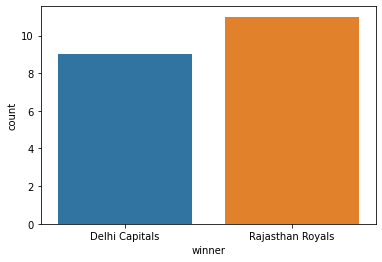

In [50]:
sb.countplot(main_df['winner'])

In [51]:
### Acc to this data , RR has an edge over DC
### Lets dig into 2020 stats

In [52]:
### In head to head 
### RR - 11 , Dc - 10

In [166]:
### looking at the stats and also the bowling lineup of DC , I think DC will win this match
### They are looking very strong and have good batsman 

# Ques 1 Ans -- DC

In [58]:
########################################################################################################################

# Ques 2 - Runs in Powerplay ?

In [59]:
df['batting_team'] = df['batting_team'].replace('Delhi Daredevils', 'Delhi Capitals')

In [60]:
main_df_team = df[(df['batting_team'] == 'Rajasthan Royals') | (df['batting_team'] == 'Delhi Capitals')]

In [61]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1084,5,2,Delhi Capitals,Royal Challengers Bangalore,1,1,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1085,5,2,Delhi Capitals,Royal Challengers Bangalore,1,2,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1086,5,2,Delhi Capitals,Royal Challengers Bangalore,1,3,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1087,5,2,Delhi Capitals,Royal Challengers Bangalore,1,4,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1088,5,2,Delhi Capitals,Royal Challengers Bangalore,1,5,SW Billings,AP Tare,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178709,11414,1,Delhi Capitals,Chennai Super Kings,20,2,TA Boult,A Mishra,RA Jadeja,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
178710,11414,1,Delhi Capitals,Chennai Super Kings,20,3,TA Boult,A Mishra,RA Jadeja,0,...,0,0,0,0,0,0,0,TA Boult,bowled,NaN
178711,11414,1,Delhi Capitals,Chennai Super Kings,20,4,I Sharma,A Mishra,RA Jadeja,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178712,11414,1,Delhi Capitals,Chennai Super Kings,20,5,I Sharma,A Mishra,RA Jadeja,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [68]:
main_df_team['over'].dtype

dtype('int64')

In [102]:
main_df_team['over'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [103]:
powerplay = main_df_team[:37]
powerplay

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1084,5,2,Delhi Capitals,Royal Challengers Bangalore,1,1,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1085,5,2,Delhi Capitals,Royal Challengers Bangalore,1,2,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1086,5,2,Delhi Capitals,Royal Challengers Bangalore,1,3,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1087,5,2,Delhi Capitals,Royal Challengers Bangalore,1,4,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1088,5,2,Delhi Capitals,Royal Challengers Bangalore,1,5,SW Billings,AP Tare,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1089,5,2,Delhi Capitals,Royal Challengers Bangalore,1,6,SW Billings,AP Tare,B Stanlake,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1090,5,2,Delhi Capitals,Royal Challengers Bangalore,1,7,SW Billings,AP Tare,B Stanlake,0,...,0,0,0,0,3,0,3,NaN,NaN,NaN
1091,5,2,Delhi Capitals,Royal Challengers Bangalore,2,1,SW Billings,AP Tare,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1092,5,2,Delhi Capitals,Royal Challengers Bangalore,2,2,SW Billings,AP Tare,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1093,5,2,Delhi Capitals,Royal Challengers Bangalore,2,3,SW Billings,AP Tare,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


1    7
6    6
5    6
4    6
3    6
2    6
Name: over, dtype: int64


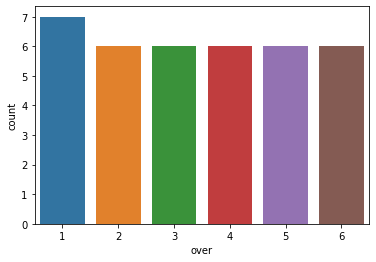

In [104]:
sb.countplot(powerplay['over'])
list = [(powerplay['over'].value_counts())]
print(sum(list))

In [105]:
powerplay.groupby(['over' , 'batting_team'])['total_runs'].sum()[:12]

over  batting_team  
1     Delhi Capitals     9
2     Delhi Capitals     4
3     Delhi Capitals     8
4     Delhi Capitals    11
5     Delhi Capitals     5
6     Delhi Capitals     6
Name: total_runs, dtype: int64

In [106]:
sum_dc = 9+4+8+11+5+6
sum_dc

43

In [145]:
## Acc to stats - powerplay score is 43
## Acc to 2020 stats - average powerplay score is above 40
## And also Shikhar Dhawan and Prithvi Shaw are good opener (right + left combo)
## Hence I choose 41-50

# Ques 2 ans - 41:50

In [109]:
########################################################################################################################

# Ques 3 - Runs by Smith ?

In [126]:
main_df_team.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1084,5,2,Delhi Capitals,Royal Challengers Bangalore,1,1,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1085,5,2,Delhi Capitals,Royal Challengers Bangalore,1,2,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1086,5,2,Delhi Capitals,Royal Challengers Bangalore,1,3,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1087,5,2,Delhi Capitals,Royal Challengers Bangalore,1,4,AP Tare,SW Billings,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1088,5,2,Delhi Capitals,Royal Challengers Bangalore,1,5,SW Billings,AP Tare,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [129]:
main_df_team.index

Int64Index([  1084,   1085,   1086,   1087,   1088,   1089,   1090,   1091,
              1092,   1093,
            ...
            178704, 178705, 178706, 178707, 178708, 178709, 178710, 178711,
            178712, 178713],
           dtype='int64', length=37987)

In [131]:
main_df_team.reset_index(inplace = True)

In [132]:
main_df_team.index

RangeIndex(start=0, stop=37987, step=1)

In [122]:
main_df_team.groupby('batsman')['total_runs'].count().sort_values(ascending = False)[:20]

batsman
AM Rahane           2353
SR Watson           1734
SV Samson           1728
V Sehwag            1410
SS Iyer             1370
R Dravid            1177
DA Warner           1107
RR Pant             1104
G Gambhir            991
KK Nair              917
NV Ojha              852
KD Karthik           835
JP Duminy            795
S Dhawan             700
YK Pathan            655
GC Smith             637
DPMD Jayawardene     628
SPD Smith            626
AB de Villiers       582
JC Buttler           579
Name: total_runs, dtype: int64

In [124]:
main_df_team.groupby('batsman')['total_runs'].sum().sort_values(ascending = False)[:20]

batsman
AM Rahane     2957
SR Watson     2489
V Sehwag      2315
SV Samson     2301
RR Pant       1855
SS Iyer       1785
DA Warner     1514
R Dravid      1346
G Gambhir     1262
KK Nair       1196
KD Karthik    1086
YK Pathan     1069
JP Duminy     1061
NV Ojha       1022
JC Buttler     947
S Dhawan       926
SPD Smith      819
STR Binny      767
Q de Kock      761
GC Smith       755
Name: total_runs, dtype: int64

In [136]:
r = 0
c =0
for i in range(0 , len(main_df_team)):
    if main_df_team.loc[i , 'batsman'] == 'SPD Smith':
        r = r + main_df_team.loc[i , 'total_runs']
        c = c+1
print(r , c)

819 626


In [137]:
162 / 7

23.142857142857142

In [138]:
## Acc to stats , Smith (one of the best Aussie Batsman) has an average runs of 23.14

# Ques 3 ans - 16-30

In [139]:
########################################################################################################################

# Ques 4 - Wides ? 

In [140]:
main_df_team.columns

Index(['level_0', 'index', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [147]:
main_df_team.groupby('over')['wide_runs'].mean()

over
1     0.058083
2     0.039702
3     0.036355
4     0.038942
5     0.031595
6     0.033367
7     0.041835
8     0.027890
9     0.028455
10    0.027425
11    0.034990
12    0.031681
13    0.039286
14    0.030224
15    0.040966
16    0.024364
17    0.033758
18    0.036628
19    0.041070
20    0.041137
Name: wide_runs, dtype: float64

In [153]:
main_df_team['wide_runs'].sum()  / 240

5.675

In [154]:
## Avg wide is 5.675

In [155]:
## But , sometimes DC bowler bowls more wide ,hehe
## Hence ans is more than 6

# Ques 4 ans - more than 6

In [156]:
####################################################################################################################

In [161]:
main_df_team['player_dismissed'].notna().sum()

1922

In [162]:
main_df_team['player_dismissed'].isna().sum()

36065

In [163]:
1922 / 240

8.008333333333333

In [164]:
## Average Around 8 wickets haul
## Lets check for 2020 stats

In [165]:
## Since , RR has been all out many num of times ,and they have more wickets downfall
## I guess RR will loose 5 wickets and Dc will loose 3 wickets

# Ques 5 ans - 6-10 wickets